# ASSIGNMENT 1

## Setup

* `$ pip install --user virtualenv`
* `$ python3 -m venv venv`
* `$ source venv/bin/activate`
* `(venv) $ pip install -r requirements.txt`
* `(venv) $ ipython kernel install --name=venv`
* **main.ipynb** > **`F1`** > `Notebook: Select Notebook Kernel` > `venv`

## Import

Before you begin to run your code, you need to load all required modules. Simply execute the code block below. This block also enables Jupyter's auto-reloading feature, so you dont need to re-import modules whenever you change them.

In [2]:
# In order to import from the python file without hassle, we add the current
# directory to the python path
import sys; sys.path.append(".")

# Auto-reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Neural Network

In [3]:
from src.util import load_data_cifar, validation_split

train_file = "./data/train_data.pckl"
test_file = "./data/test_data.pckl"

train_data, train_class, test_data, test_class = load_data_cifar(
    train_file=train_file, test_file=test_file
)

data, truths, val_data, val_truths = validation_split(
    dataset=train_data, ground_truths=train_class, pct=0.1
)

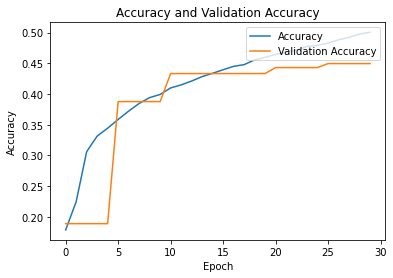

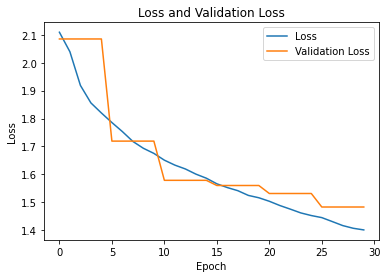

In [3]:
from src.network import Network
from src.util import plot_model
from src.activations import sigmoid, sigmoid_prime


optimizer_config = {"type": "adam", "epsilon": 1e-7, "beta_1": 0.9, "beta_2": 0.999}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 5

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=128, type="hidden")
net.add_layer(neurons=64, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.001)
net.set(property="decay", val=0.00001)
net.set(property="validation_k", val=validation_k)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=30,
    mini_batch_size=24,
)
plot_model(acc, loss, val_acc, val_loss, validation_k)

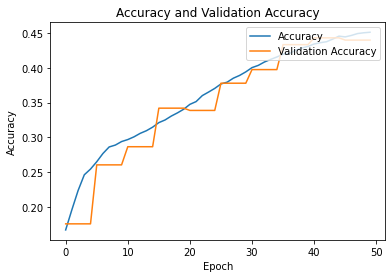

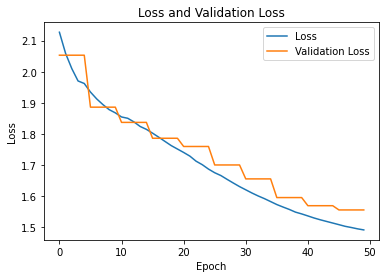

In [6]:
from src.network import Network
from src.util import plot_model
from src.activations import sigmoid, sigmoid_prime


optimizer_config = {"type": "adam", "epsilon": 1e-7, "beta_1": 0.9, "beta_2": 0.999}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 5

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=100, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.001)
net.set(property="decay", val=0.00001)
net.set(property="validation_k", val=validation_k)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=50,
    mini_batch_size=8,
)
plot_model(acc, loss, val_acc, val_loss, validation_k)

# Baseline Model (Adam, L2, LR Scheduling)

In [18]:
results = {}

In [25]:
from src.network import Network
from src.activations import sigmoid, sigmoid_prime


optimizer_config = {"type": "adam", "epsilon": 1e-7, "beta_1": 0.9, "beta_2": 0.999}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 5

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=128, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.01)
net.set(property="decay", val=0.0001)
net.set(property="validation_k", val=validation_k)
net.set(property="lambda", val=0.01)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=40,
    mini_batch_size=24,
)
f_loss, f_acc = net.eval_network(test_data, test_class)
results["adam"] = {
    "acc": acc,
    "loss": loss,
    "val_acc": val_acc,
    "val_loss": val_loss,
    "f_acc": f_acc,
    "f_loss": f_loss
}

print(f"Test Data | Accuracy: {f_acc:.4f}, Loss {f_loss:.4f}")

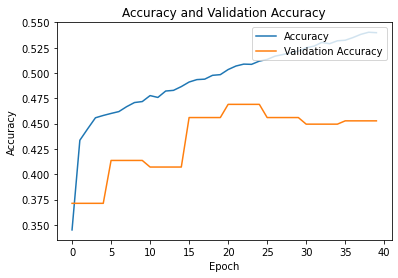

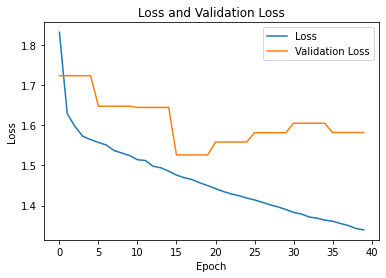

In [21]:
plot_model(acc, loss, val_acc, val_loss, validation_k)

### SGD, Learning Rate Schedule, L2 Regularization

In [ ]:
from src.network import Network
from src.activations import sigmoid, sigmoid_prime


hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 5

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=180, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="sgd", val={})
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.001)
net.set(property="decay", val=0.00001)
net.set(property="validation_k", val=validation_k)
net.set(property="lambda", val=0.01)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=40,
    mini_batch_size=24,
)
f_loss, f_acc = net.eval_network(test_data, test_class)
results["adam"] = {
    "acc": acc,
    "loss": loss,
    "val_acc": val_acc,
    "val_loss": val_loss,
    "f_acc": f_acc,
    "f_loss": f_loss
}

print(f"Test Data | Accuracy: {f_acc:.4f}, Loss {f_loss:.4f}")

### Adam, Learning Rate Schedule, No Regularization

In [ ]:
from src.network import Network
from src.activations import sigmoid, sigmoid_prime


optimizer_config = {"type": "adam", "epsilon": 1e-4, "beta_1": 0.9, "beta_2": 0.999}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 5

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=180, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.001)
net.set(property="decay", val=0.00001)
net.set(property="validation_k", val=validation_k)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=40,
    mini_batch_size=24,
)
f_loss, f_acc = net.eval_network(test_data, test_class)
results["adam"] = {
    "acc": acc,
    "loss": loss,
    "val_acc": val_acc,
    "val_loss": val_loss,
    "f_acc": f_acc,
    "f_loss": f_loss
}

print(f"Test Data | Accuracy: {f_acc:.4f}, Loss {f_loss:.4f}")

### Adam, No Learning Rate Schedule, L2 Regularization

In [ ]:
from src.network import Network
from src.activations import sigmoid, sigmoid_prime


optimizer_config = {"type": "adam", "epsilon": 1e-4, "beta_1": 0.9, "beta_2": 0.999}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 5

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=180, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.001)
net.set(property="validation_k", val=validation_k)
net.set(property="lambda", val=0.01)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=40,
    mini_batch_size=24,
)
f_loss, f_acc = net.eval_network(test_data, test_class)
results["adam"] = {
    "acc": acc,
    "loss": loss,
    "val_acc": val_acc,
    "val_loss": val_loss,
    "f_acc": f_acc,
    "f_loss": f_loss
}

print(f"Test Data | Accuracy: {f_acc:.4f}, Loss {f_loss:.4f}")

In [ ]:
from src.util import compare_models

adam = results["adam"]
sgd = results["sgd"]

compare_models(
    adam["acc"],
    sgd["acc"],
    adam["val_acc"],
    sgd["val_acc"],
    "Accuracy",
    "Adam",
    "SGD",
    validation_k,
)
compare_models(
    adam["loss"],
    sgd["loss"],
    adam["val_loss"],
    sgd["val_loss"],
    "Loss",
    "Adam",
    "SGD",
    validation_k,
)

In [ ]:
from src.util import compare_models

adam = results["adam"]
no_reg = results["adam_no_reg"]

compare_models(
    adam["acc"],
    no_reg["acc"],
    adam["val_acc"],
    no_reg["val_acc"],
    "Accuracy",
    "Regularized",
    "Not Regularized",
    validation_k,
)
compare_models(
    adam["loss"],
    no_reg["loss"],
    adam["val_loss"],
    no_reg["val_loss"],
    "Loss",
    "Regularized",
    "Not Regularized",
    validation_k,
)

In [ ]:
from src.util import compare_models

adam = results["adam"]
no_lr = results["adam_no_lr_sched"]

compare_models(
    adam["acc"],
    no_lr["acc"],
    adam["val_acc"],
    no_lr["val_acc"],
    "Accuracy",
    "Scheduled LR",
    "LR Not Scheduled",
    validation_k,
)
compare_models(
    adam["loss"],
    no_lr["loss"],
    adam["val_loss"],
    no_lr["val_loss"],
    "Loss",
    "Scheduled LR",
    "LR Not Scheduled",
    validation_k,
)